In [1]:
# This code should take cleaned data from the Kaggle
# Ammes, IA housing competition and create plots
# to assess the shape of our predictive variables.

In [2]:
# Import modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing

In [3]:
# Import data
train = pd.read_csv('../data/train_clean.csv', index_col=0)
qual = pd.read_csv('../data/train_qual.csv', index_col=0)
hoods = pd.read_csv('../data/train_hoods.csv', index_col=0)

In [4]:
# This cat.codes function does what we wanted to catagoricals
# https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe/32011969
# Still have to list the catagoris to make then type'catagory'

hoods['Neighborhood'] = hoods['Neighborhood'].astype('category')
cat_columns = hoods.select_dtypes(['category']).columns
hoods[cat_columns] = hoods[cat_columns].apply(lambda x: x.cat.codes)

# Uncomment below to check it out
# print(hoods)

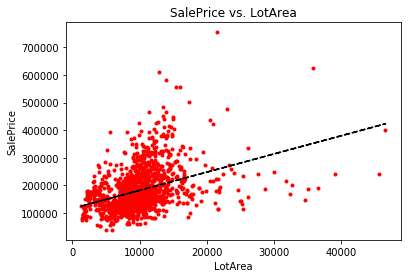

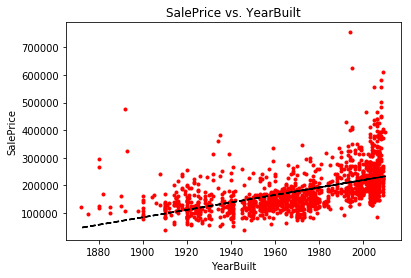

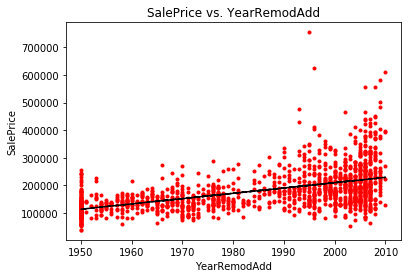

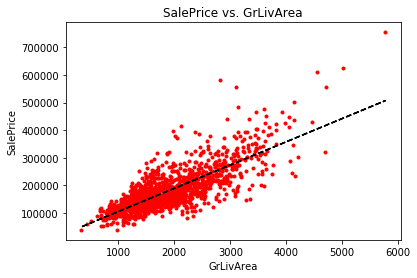

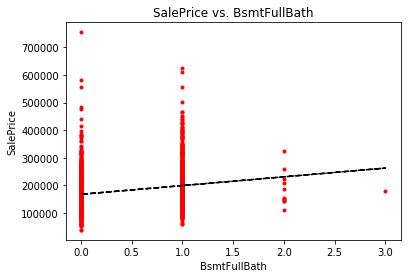

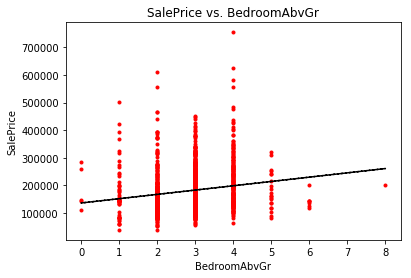

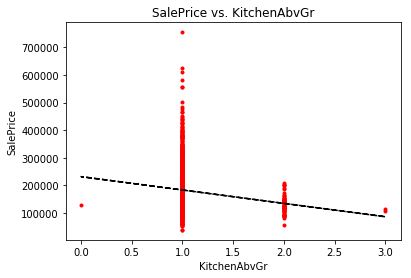

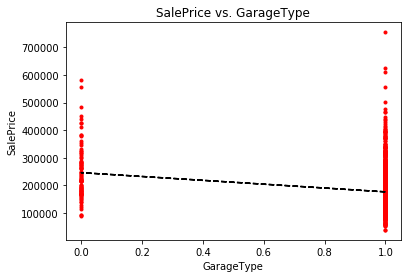

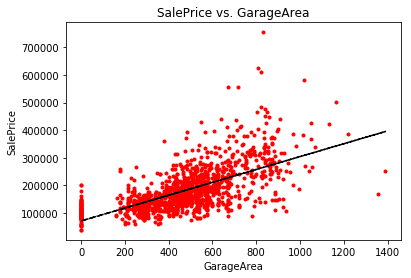

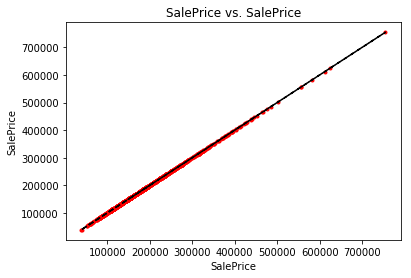

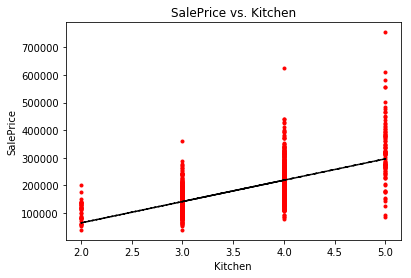

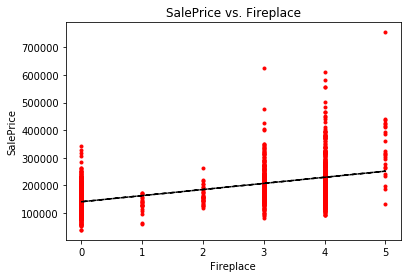

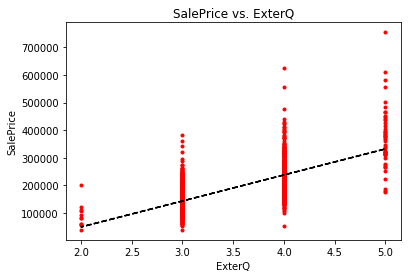

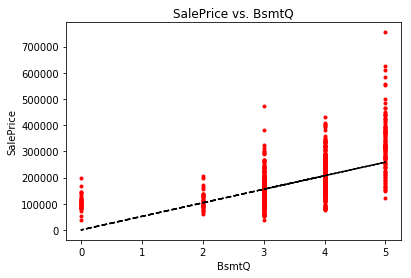

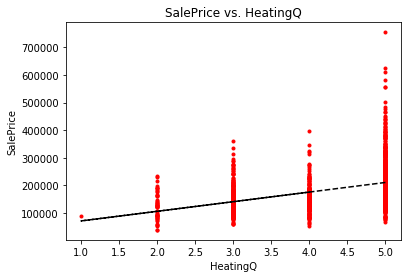

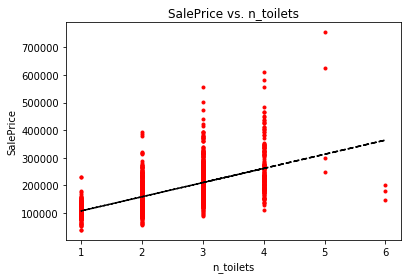

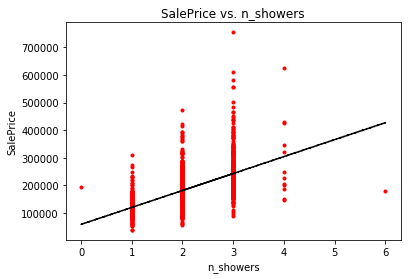

In [5]:
# Create Scatter Plots

for col in train.columns:
    
    x = train[col]
    y = train['SalePrice']
    
    # Plot
#     plt.scatter(x, y, marker=".", c = "blue")
    
    # Lables
    plt.title('SalePrice vs. ' + col)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    
    # Fit Line
    m,b = np.polyfit(x, y, 1)
    
    # Plot
    plt.plot(x, y, 'r.', x, m*x+b, '--k') 
    
    plt.show()


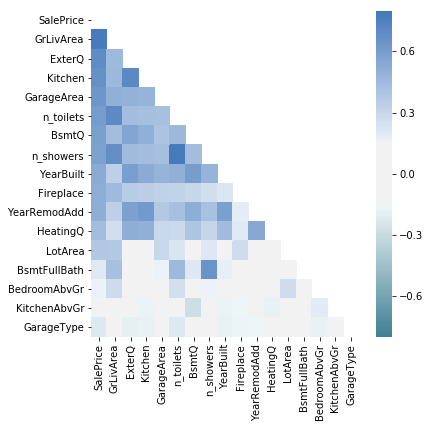

In [6]:
import seaborn as sns

# Calculate correlations
corr = train.corr()

# Cluster by max
corr = corr.sort_values(by=['SalePrice'], ascending=False, axis =0)
corr = corr.sort_values(by=['SalePrice'], ascending=False, axis =1)

# Make it triangular
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(220, 250, sep=50, as_cmap=True)
sns.heatmap(ax=ax, data=corr, mask=mask, cmap=cmap, vmin=-0.8, vmax=0.8)

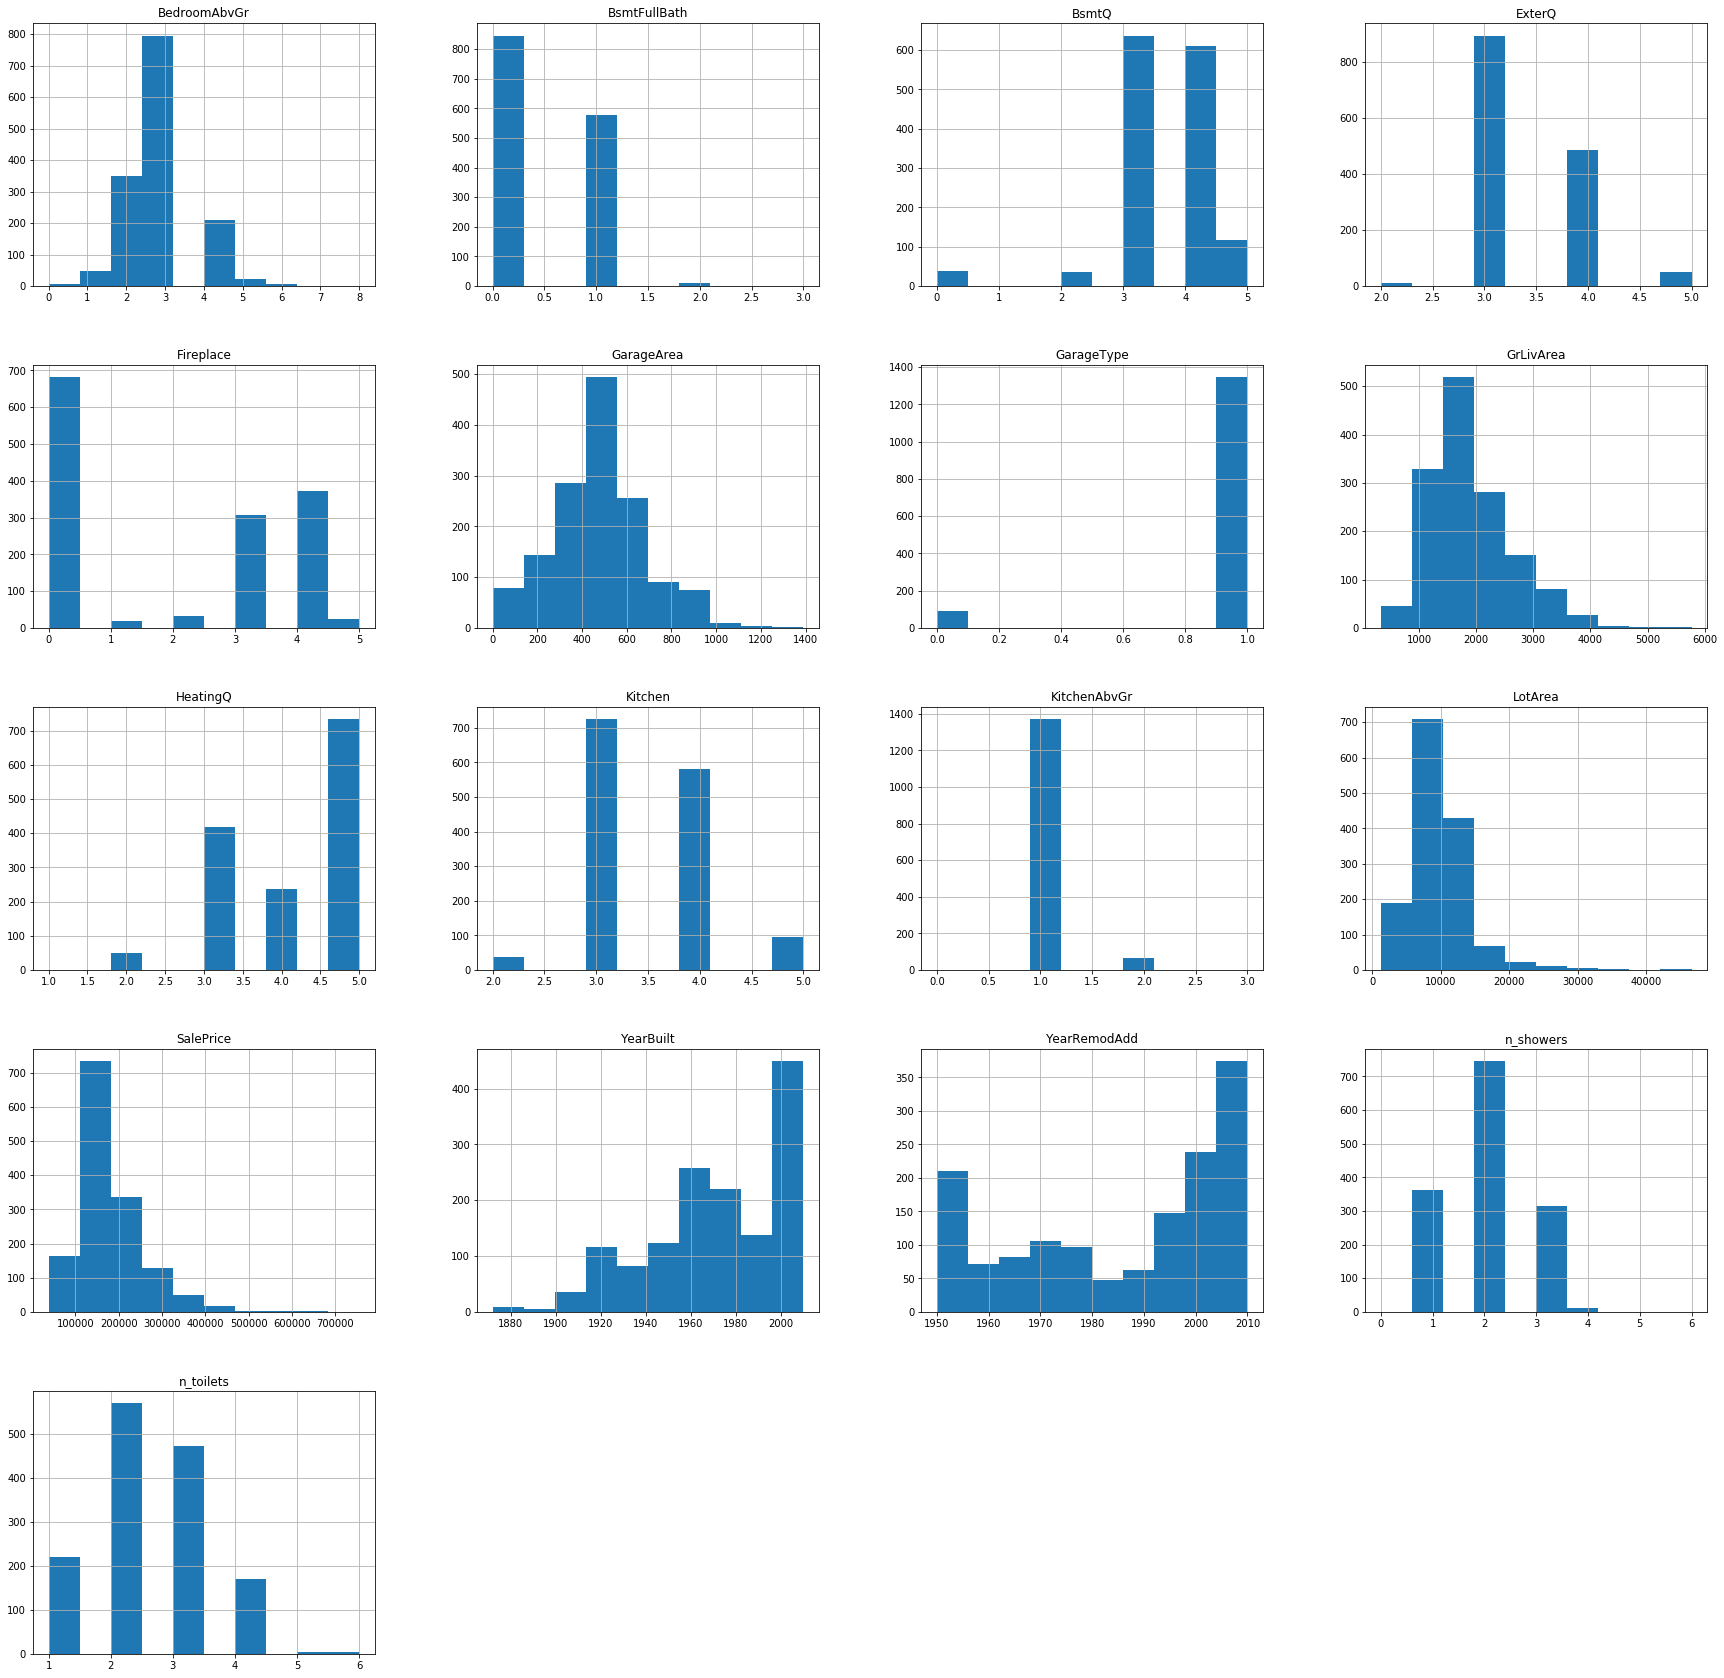

In [7]:
train.hist(figsize=(30,30))

plt.show()

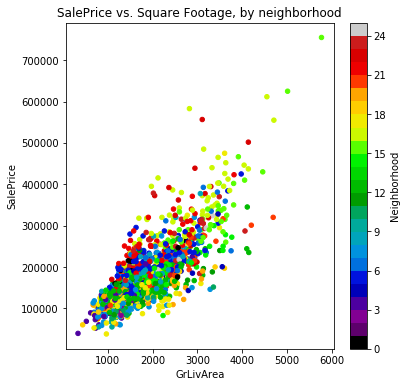

In [8]:
# Price vs. Space by Neighborhood

x = train['GrLivArea']
y = train['SalePrice']
tag = hoods['Neighborhood']

    
    # Plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

 # Number of labels
N = len(set(hoods['Neighborhood']))

cmap = plt.cm.nipy_spectral
# extract all colors from the .gist_ncar map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,s=20,c=tag,cmap=cmap,norm=norm)
# create the colorbar
cb = plt.colorbar(scat)
cb.set_label('Neighborhood')
ax.set_title('SalePrice vs. Square Footage, by neighborhood')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')


plt.show()

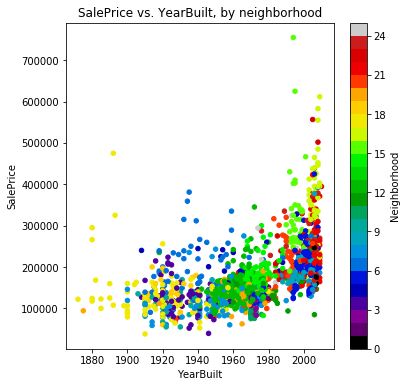

In [9]:
# Price vs. YearBuilt by Neighborhood

x = train['YearBuilt']
y = train['SalePrice']
tag = hoods['Neighborhood']

    
    # Plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

 # Number of labels
N = len(set(hoods['Neighborhood']))

cmap = plt.cm.nipy_spectral
# extract all colors from the .gist_ncar map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,s=20,c=tag,cmap=cmap,norm=norm)
# create the colorbar
cb = plt.colorbar(scat)
cb.set_label('Neighborhood')
ax.set_title('SalePrice vs. YearBuilt, by neighborhood')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')


plt.show()

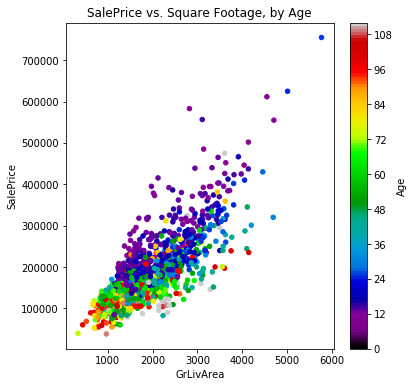

In [10]:
# Price vs. Living Area by Age

age = train[['YearBuilt']]
age = 2019-age

x = train['GrLivArea']
y = train['SalePrice']
tag = age['YearBuilt']

    
    # Plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

 # Number of labels
N = len(set(age['YearBuilt']))

cmap = plt.cm.nipy_spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,s=20,c=tag,cmap=cmap,norm=norm)
# create the colorbar
cb = plt.colorbar(scat)
cb.set_label('Age')
ax.set_title('SalePrice vs. Square Footage, by Age')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')


plt.show()

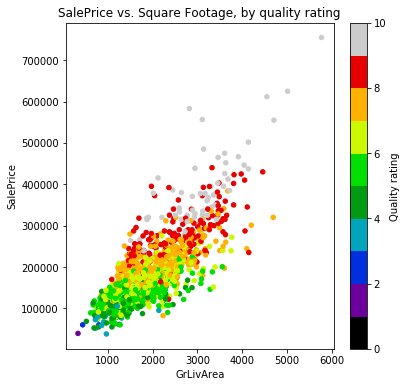

In [11]:
# Price vs. Living Area by Quality Rating

x = train['GrLivArea']
y = train['SalePrice']
tag = qual['OverallQual']

    
    # Plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

 # Number of labels
N = len(set(qual['OverallQual']))

cmap = plt.cm.nipy_spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,s=20,c=tag,cmap=cmap,norm=norm)
# create the colorbar
cb = plt.colorbar(scat)
cb.set_label('Quality rating')
ax.set_title('SalePrice vs. Square Footage, by quality rating')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')


plt.show()

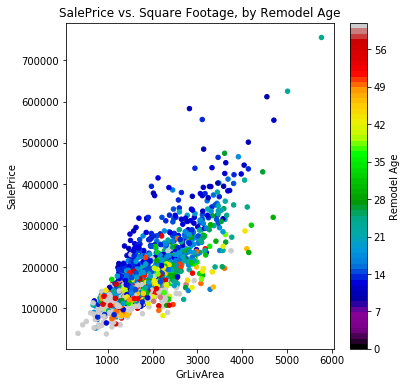

In [12]:
# Price vs. Living Area by Age of remodel

remodel = train[['YearRemodAdd']]
remodel = 2019-remodel

x = train['GrLivArea']
y = train['SalePrice']
tag = remodel['YearRemodAdd']

    
    # Plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

 # Number of labels
N = len(set(remodel['YearRemodAdd']))

cmap = plt.cm.nipy_spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,s=20,c=tag,cmap=cmap,norm=norm)
# create the colorbar
cb = plt.colorbar(scat)
cb.set_label('Remodel Age')
ax.set_title('SalePrice vs. Square Footage, by Remodel Age')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')


plt.show()

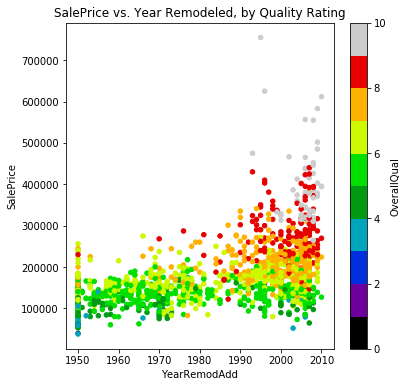

In [13]:
# Price vs. Year Remodeled by Quality Rating


x = train['YearRemodAdd']
y = train['SalePrice']
tag = qual['OverallQual']

    
    # Plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

 # Number of labels
N = len(set(qual['OverallQual']))

cmap = plt.cm.nipy_spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,s=20,c=tag,cmap=cmap,norm=norm)
# create the colorbar
cb = plt.colorbar(scat)
cb.set_label('OverallQual')
ax.set_title('SalePrice vs. Year Remodeled, by Quality Rating')
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')


plt.show()

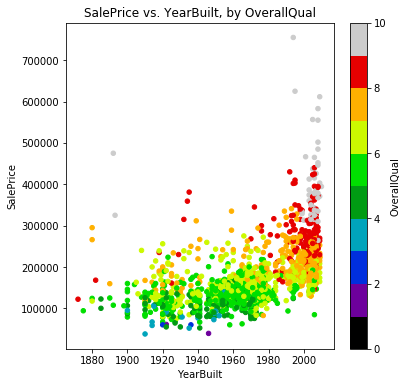

In [14]:
# Price vs. YearBuilt by Quality Rating

x = train['YearBuilt']
y = train['SalePrice']
tag = qual['OverallQual']

    
    # Plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

 # Number of labels
N = len(set(qual['OverallQual']))

cmap = plt.cm.nipy_spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,s=20,c=tag,cmap=cmap,norm=norm)
# create the colorbar
cb = plt.colorbar(scat)
cb.set_label('OverallQual')
ax.set_title('SalePrice vs. YearBuilt, by OverallQual')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')


plt.show()

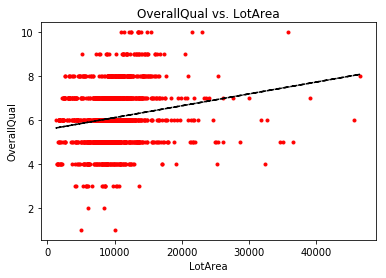

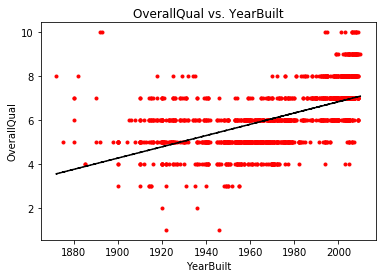

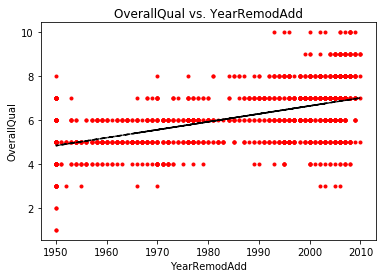

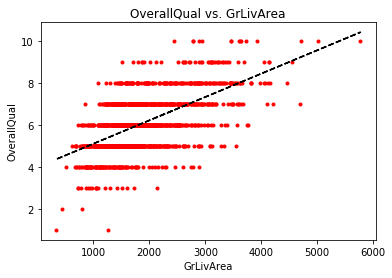

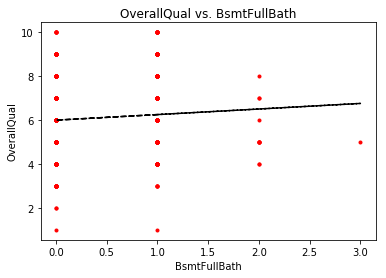

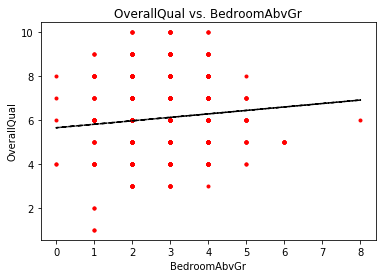

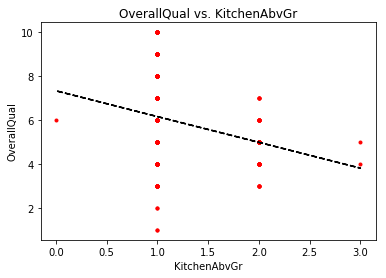

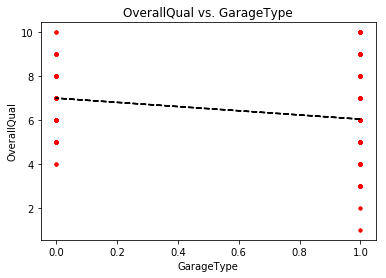

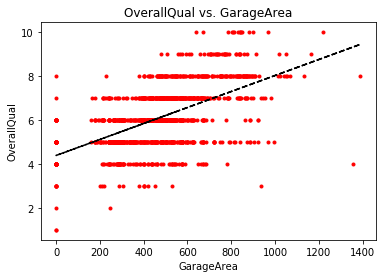

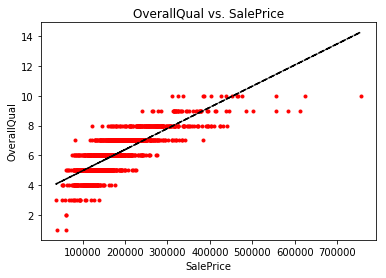

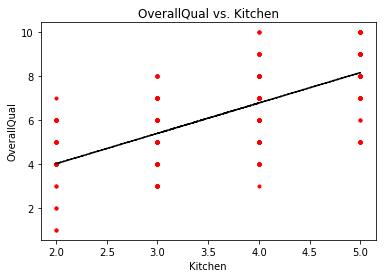

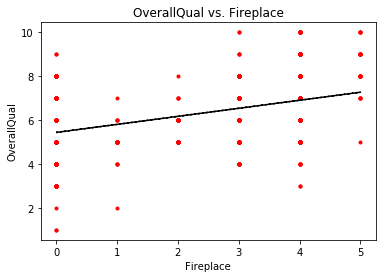

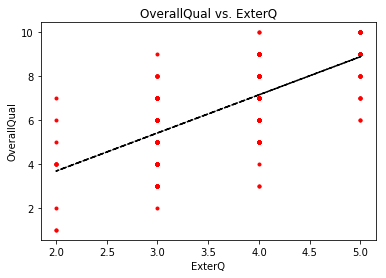

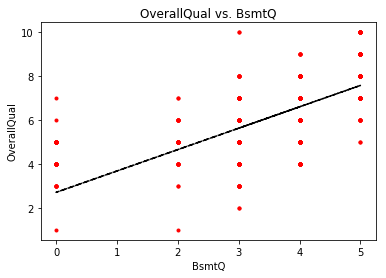

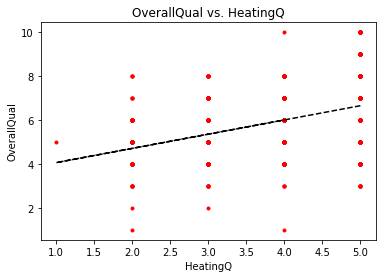

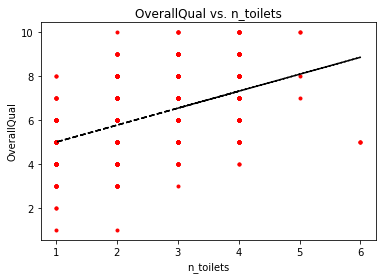

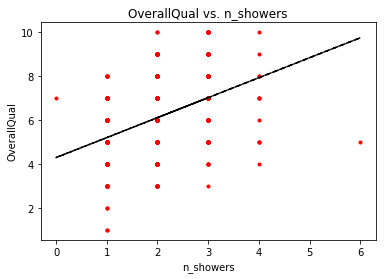

In [15]:
# Create Scatter Plots vs. Quality

for col in train.columns:
    
    x = train[col]
    y = qual['OverallQual']
    
    # Plot
#     plt.scatter(x, y, marker=".", c = "blue")
    
    # Lables
    plt.title('OverallQual vs. ' + col)
    plt.xlabel(col)
    plt.ylabel('OverallQual')
    
    # Fit Line
    m,b = np.polyfit(x, y, 1)
    
    # Plot
    plt.plot(x, y, 'r.', x, m*x+b, '--k') 
    
    plt.show()


In [22]:
sum(np.isnan(qual['OverallQual']))

0